<a href="https://colab.research.google.com/github/AnnaBozhenko/ML_course/blob/master/03_pyTorch_custom_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download to colab 101-food datset

In [25]:
from pathlib import Path
import requests
import zipfile

# create folder hirarchy if not exists
PARENT_DIR_NAME = Path("data/")
FOOD_DATASET_DIR_NAME = "pizza_sushi_steak"
FULL_FOOD_DATASET_PATH = PARENT_DIR_NAME / FOOD_DATASET_DIR_NAME

if not FULL_FOOD_DATASET_PATH.is_dir():
  PARENT_DIR_NAME.mkdir(parents=True, exist_ok=True)

# dowloading from source to colab zip-file
with open(PARENT_DIR_NAME / "pizza_sushi_steak.zip", "wb") as f:
  # "https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip"
  source = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  f.write(source.content)

# unzipping the file
with zipfile.ZipFile(PARENT_DIR_NAME / "pizza_sushi_steak.zip") as zip_ref:
  zip_ref.extractall(FULL_FOOD_DATASET_PATH)

In [39]:
from random import choice, seed
from PIL import Image

image class: steak
image width: 512
image height: 512


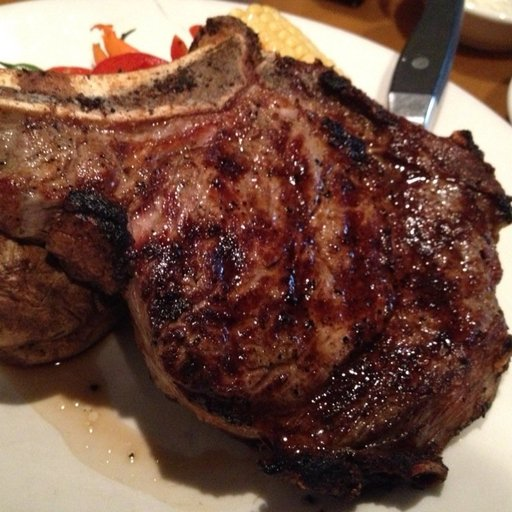

In [81]:
# seed(42)
# extract any image from the any child folder of data folder
paths_images = list(FULL_FOOD_DATASET_PATH.glob("*/*/*.jpg"))

random_image = choice(paths_images)
random_image_class = random_image.parent.stem

image = Image.open(random_image)

print(f"image class: {random_image_class}")
print(f"image width: {image.width}")
print(f"image height: {image.height}")
image


In [51]:
import matplotlib.pyplot as plt
import numpy as np


In [ ]:

image_as_ndarray = np.asarray(image)
print(f"image full path: {random_image}")
print(f"image shape (): {image_as_ndarray.shape}")
plt.title(random_image_class)
plt.imshow(image_as_ndarray)
plt.axis(False)


# Transform images to Tensors

In [53]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader

In [66]:
transform_data = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [68]:
transform_data(image).shape

torch.Size([3, 64, 64])

In [75]:
from random import seed, choices
from PIL import Image

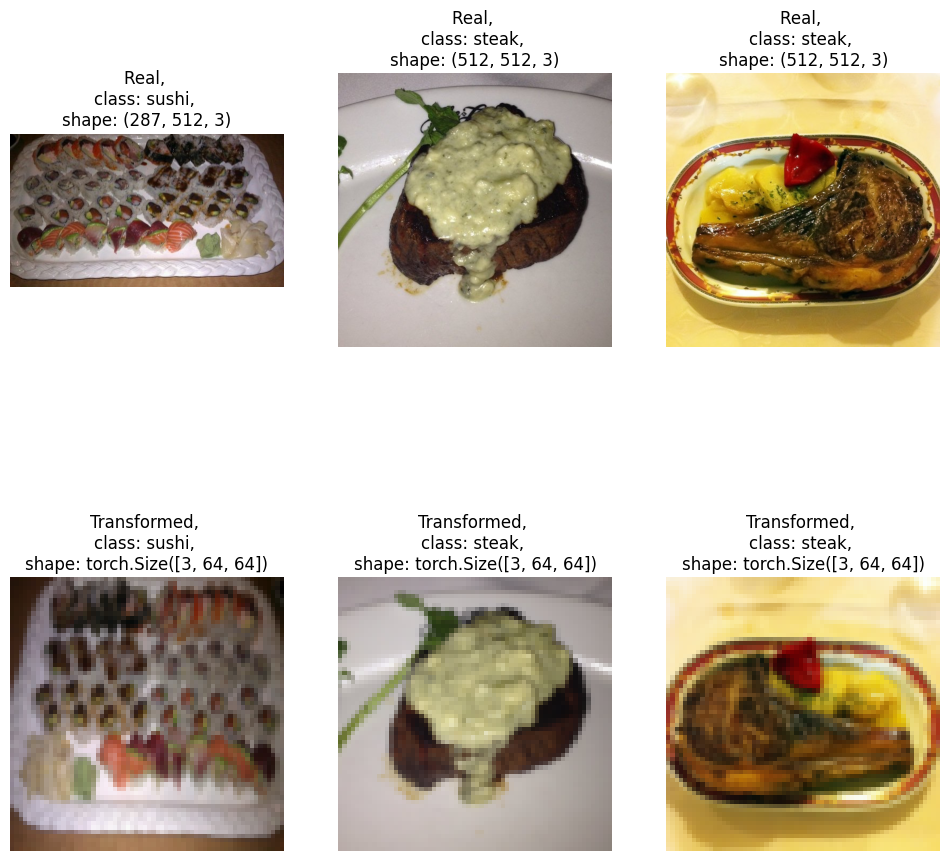

In [88]:
# plot randomly selected images and their transformations

def plot_random_images(image_paths,
                       transform,
                       n=3,
                       random_seed=42):
  seed(random_seed)
  images_paths = choices(image_paths, k=n)

  images = [Image.open(image_path) for image_path in images_paths]
  transformed_images = [transform(image) for image in images]

  fig = plt.figure(figsize=(12, 12))
  rows, cols = 2, n
  for i in range(cols):
    fig.add_subplot(2, n, i+1)
    image = np.asarray(images[i])
    plt.imshow(image)
    plt.title(f"Real, \nclass: {images_paths[i].parent.stem}, \nshape: {image.shape}")
    plt.axis(False)

    # plot the transformed one
    image = transformed_images[i]
    plot_index = cols + i + 1
    fig.add_subplot(2, n, plot_index)
    # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
    plt.imshow(image.permute(1, 2, 0).squeeze())
    plt.title(f"Transformed, \nclass: {images_paths[i].parent.stem}, \nshape: {image.shape}")
    plt.axis(False)


plot_random_images(image_paths=paths_images,
                   transform=transform_data,
                   n=3)
  # for i in range(cols):
  #   plt.subplot(2, n, i+1)